## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [5]:
X = np.linspace(0,20)
np.random.shuffle(X)
X

array([10.6122449 ,  9.79591837, 12.24489796, 14.28571429, 14.69387755,
        1.63265306, 15.51020408, 13.87755102,  6.53061224, 19.18367347,
       16.73469388, 19.59183673,  3.26530612, 10.20408163, 13.46938776,
       18.36734694,  4.08163265,  7.75510204, 15.10204082, 17.14285714,
        7.34693878,  8.97959184, 16.32653061,  2.04081633, 18.7755102 ,
        8.16326531, 17.55102041,  4.89795918,  0.        , 20.        ,
        8.57142857, 11.42857143,  3.67346939,  5.30612245,  1.2244898 ,
        0.40816327,  9.3877551 ,  4.48979592, 12.65306122, 15.91836735,
        5.71428571, 17.95918367, 13.06122449,  2.44897959, 11.02040816,
        6.93877551,  2.85714286,  6.12244898, 11.83673469,  0.81632653])

In [6]:
a=-1
b=2
y=a*X+b
y

array([ -8.6122449 ,  -7.79591837, -10.24489796, -12.28571429,
       -12.69387755,   0.36734694, -13.51020408, -11.87755102,
        -4.53061224, -17.18367347, -14.73469388, -17.59183673,
        -1.26530612,  -8.20408163, -11.46938776, -16.36734694,
        -2.08163265,  -5.75510204, -13.10204082, -15.14285714,
        -5.34693878,  -6.97959184, -14.32653061,  -0.04081633,
       -16.7755102 ,  -6.16326531, -15.55102041,  -2.89795918,
         2.        , -18.        ,  -6.57142857,  -9.42857143,
        -1.67346939,  -3.30612245,   0.7755102 ,   1.59183673,
        -7.3877551 ,  -2.48979592, -10.65306122, -13.91836735,
        -3.71428571, -15.95918367, -11.06122449,  -0.44897959,
        -9.02040816,  -4.93877551,  -0.85714286,  -4.12244898,
        -9.83673469,   1.18367347])

#### Plot X vs. y

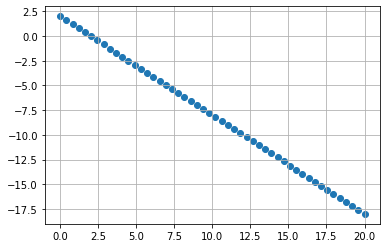

In [7]:
plt.scatter(X,y)
plt.grid()
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [16]:
def Adagrad(x, y, learning_rate, epsilon ,max_epochs) :
  iteration = 0
  iteration_arr = []
  theta_0 = 0
  theta_1 = 0
  theta_0_arr = []
  theta_1_arr = []
  j = []
  h_x_arr = []
  vt = [0,0]
  while (len(j)<2) or (iteration < max_epochs and j[-2]-j[-1] > 0.001 and np.linalg.norm(gradient_vector) > 0.001) :
    h_x = theta_0 + theta_1 * x
    h_x_arr += [h_x]
    error_vector = h_x-y
    j = j + [np.dot(error_vector,error_vector)/(2*len(y))]
    d_theta_0 = np.sum(error_vector)/len(y)
    d_theta_1 = np.sum(error_vector*x)/len(y)
    vt[0] += d_theta_0**2
    vt[1] += d_theta_1**2
    gradient_vector = np.array([ [d_theta_0],[d_theta_1] ])
    theta_0 = theta_0 - (learning_rate/(vt[0]**0.5+epsilon))*d_theta_0
    theta_1 = theta_1 - (learning_rate/(vt[1]**0.5+epsilon))*d_theta_1
    theta_0_arr = theta_0_arr + [theta_0]
    theta_1_arr = theta_1_arr + [theta_1]
    iteration_arr = iteration_arr + [iteration]
    print("**************Iteration ",iteration,"**************")
    print("h(x) : ",h_x)
    print("Error Vector : \n",error_vector)
    print("j = ",j[-1])
    print("Gradient Vector = ",gradient_vector)
    print("Gradient Vector Norm = ",np.linalg.norm(gradient_vector))
    print("theta_0_new  = ",theta_0)
    print("theta_1_new = ",theta_1)
    iteration += 1
  return theta_0_arr, theta_1_arr, j, h_x_arr, theta_0, theta_1, iteration_arr

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [52]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adagrad(X,y,0.05,1e-08,500)

Streaming output truncated to the last 5000 lines.
 -11.99604442  -3.12186588  -5.40379751  -9.96766076 -11.23540055
  -5.15024955  -6.16444138 -10.72830463  -1.85412609 -12.24959238
  -5.65734546 -11.48894851  -3.6289618   -0.5863863  -13.01023626
  -5.91089342  -7.68572913  -2.86831792  -3.88250976  -1.34703017
  -0.83993426  -6.41798934  -3.37541384  -8.44637301 -10.47475667
  -4.13605772 -11.74249646  -8.69992096  -2.10767405  -7.43218117
  -4.89670159  -2.36122201  -4.38960567  -7.93927709  -1.09348222]
Error Vector : 
 [ 1.43361168  1.12438107  2.05207291  2.82514945  2.97976475 -1.96792507
  3.28899537  2.67053414 -0.11254139  4.68053313  3.75284129  4.83514844
 -1.34946384  1.27899638  2.51591883  4.37130252 -1.04023323  0.35130453
  3.13438006  3.90745659  0.19668923  0.81515046  3.59822598 -1.81330976
  4.52591782  0.50591984  4.0620719  -0.73100261 -2.5863863   4.98976374
  0.66053515  1.7428423  -1.19484854 -0.57638731 -2.12254038 -2.43177099
  0.96976576 -0.88561792  2.206

In [53]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9484638125790851

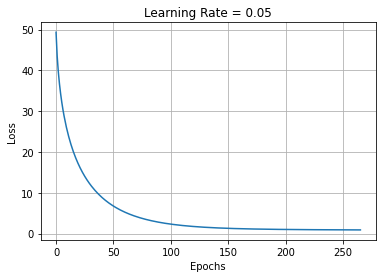

In [54]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05')
plt.grid()
plt.show()

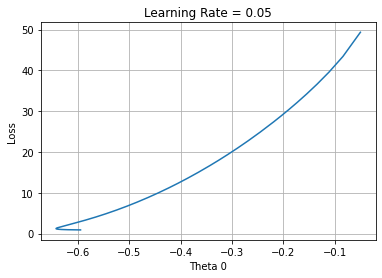

In [24]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05')
plt.grid()
plt.show()

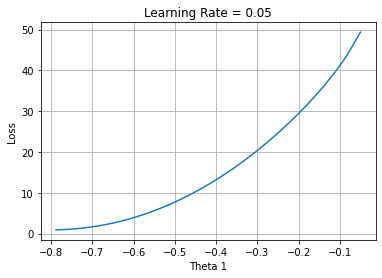

In [25]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05')
plt.grid()
plt.show()

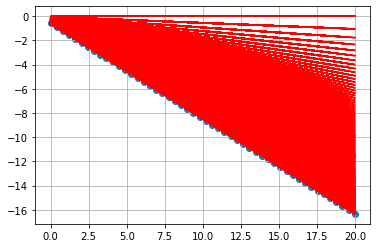

In [26]:
plt.scatter(X,h_x[-1])
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

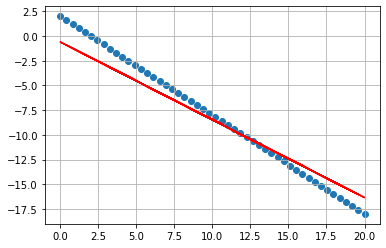

In [27]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [55]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adagrad(X,y,0.005,1e-08,5000)

Streaming output truncated to the last 5000 lines.
j =  5.294769582518215
Gradient Vector =  [[ 1.92298281]
 [34.69265364]]
Gradient Vector Norm =  34.745907377596986
theta_0_new  =  -0.5339843738925782
theta_1_new =  -0.5543479015373864
**************Iteration  4822 **************
h(x) :  [ -6.41686006  -5.96433116  -7.32191786  -8.45324011  -8.67950456
  -1.43904217  -9.13203346  -8.22697566  -4.15421557 -11.16841351
  -9.81082681 -11.39467796  -2.34409997  -6.19059561  -8.00071121
 -10.71588461  -2.79662887  -4.83300892  -8.90576901 -10.03709126
  -4.60674447  -5.51180227  -9.58456236  -1.66530662 -10.94214906
  -5.05927337 -10.26335571  -3.24915777  -0.53398437 -11.6209424
  -5.28553782  -6.86938896  -2.57036442  -3.47542222  -1.21277772
  -0.76024882  -5.73806671  -3.02289332  -7.54818231  -9.35829791
  -3.70168667 -10.48962016  -7.77444676  -1.89157107  -6.64312451
  -4.38048002  -2.11783552  -3.92795112  -7.09565341  -0.98651327]
Error Vector : 
 [ 2.19538483  1.8315872   2.9229

In [29]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.7095974929894115

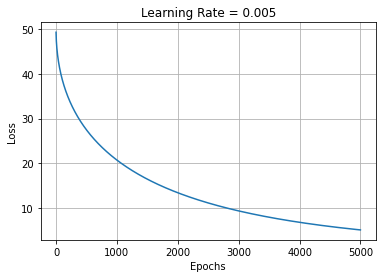

In [56]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005')
plt.grid()
plt.show()

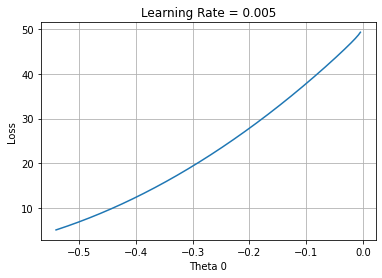

In [57]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005')
plt.grid()
plt.show()

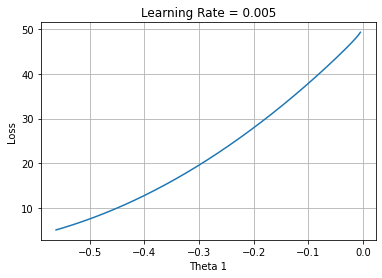

In [58]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005')
plt.grid()
plt.show()

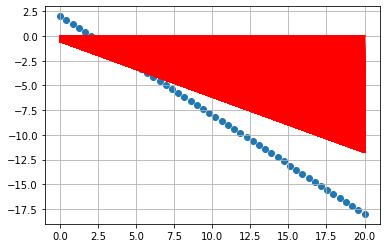

In [35]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

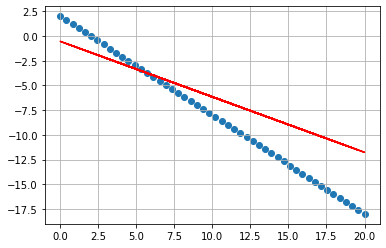

In [34]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [59]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adagrad(X,y,0.0005,1e-08,5000)

Streaming output truncated to the last 5000 lines.
 10.32122301  0.26751376  8.38781738  4.52100613  0.65419488  3.74764388
  9.16117963 -1.27921074]
j =  43.105479431296004
Gradient Vector =  [[  7.42111457]
 [107.07904133]]
Gradient Vector Norm =  107.33589349757465
theta_0_new  =  -0.05258201534435823
theta_1_new =  -0.05264028731510001
**************Iteration  2915 **************
h(x) :  [-0.61121364 -0.56824197 -0.69715696 -0.80458612 -0.82607195 -0.13852534
 -0.86904361 -0.78310029 -0.39635532 -1.0624161  -0.93350111 -1.08390193
 -0.22446867 -0.5897278  -0.76161446 -1.01944444 -0.26744033 -0.46081281
 -0.84755778 -0.95498694 -0.43932698 -0.52527031 -0.91201528 -0.16001117
 -1.04093027 -0.48229865 -0.97647277 -0.31041199 -0.05258202 -1.10538776
 -0.50378448 -0.6541853  -0.2459545  -0.33189783 -0.11703951 -0.07406785
 -0.54675614 -0.28892616 -0.71864279 -0.89052945 -0.35338366 -0.9979586
 -0.74012863 -0.181497   -0.63269947 -0.41784115 -0.20298284 -0.37486949
 -0.67567113 -0.095553

In [37]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

-1.4736441832884104

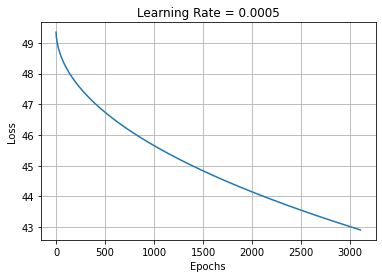

In [60]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005')
plt.grid()
plt.show()

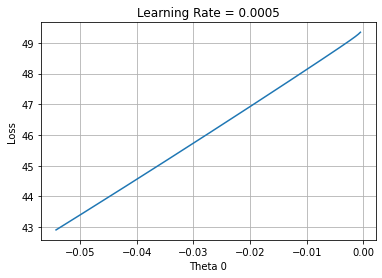

In [61]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005')
plt.grid()
plt.show()

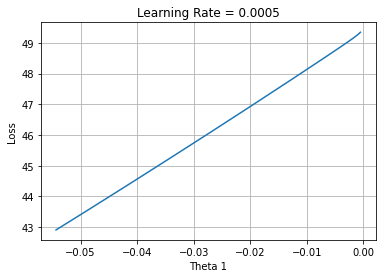

In [62]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005')
plt.grid()
plt.show()

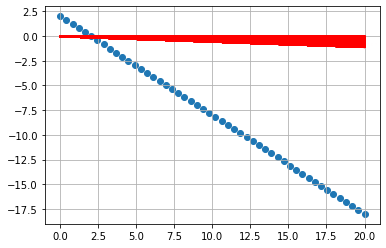

In [41]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

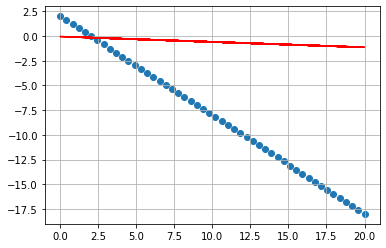

In [42]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [63]:
def RmsProp(x,y,learning_rate,epsilon,beta,max_epochs) :
  iteration = 0
  iteration_arr = []
  theta_0 = 0
  theta_1 = 0
  theta_0_arr = []
  theta_1_arr = []
  j = []
  h_x_arr = []
  vt = [0,0]
  while (len(j)<2) or (iteration < max_epochs and j[-2]-j[-1] > 0.001 and np.linalg.norm(gradient_vector) > 0.001) :
    h_x = theta_0 + theta_1 * x
    h_x_arr += [h_x]
    error_vector = h_x-y
    j = j + [np.dot(error_vector,error_vector)/(2*len(y))]
    d_theta_0 = np.sum(error_vector)/len(y)
    d_theta_1 = np.sum(error_vector*x)/len(y)
    vt[0] = beta*vt[0] + (1-beta)*(d_theta_0**2)
    vt[1] = beta*vt[1] + (1-beta)*(d_theta_1**2)
    gradient_vector = np.array([ [d_theta_0],[d_theta_1] ])
    theta_0 = theta_0 - (learning_rate/(vt[0]**0.5+epsilon))*d_theta_0
    theta_1 = theta_1 - (learning_rate/(vt[1]**0.5+epsilon))*d_theta_1
    theta_0_arr = theta_0_arr + [theta_0]
    theta_1_arr = theta_1_arr + [theta_1]
    iteration_arr = iteration_arr + [iteration]
    print("**************Iteration ",iteration,"**************")
    print("h(x) : ",h_x)
    print("Error Vector : \n",error_vector)
    print("j = ",j[-1])
    print("Gradient Vector = ",gradient_vector)
    print("Gradient Vector Norm = ",np.linalg.norm(gradient_vector))
    print("theta_0_new  = ",theta_0)
    print("theta_1_new = ",theta_1)
    iteration += 1
  return theta_0_arr, theta_1_arr, j, h_x_arr, theta_0, theta_1, iteration_arr

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [64]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = RmsProp(X,y,0.05,1e-08,0.9,500)

**************Iteration  0 **************
h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector : 
 [ 8.6122449   7.79591837 10.24489796 12.28571429 12.69387755 -0.36734694
 13.51020408 11.87755102  4.53061224 17.18367347 14.73469388 17.59183673
  1.26530612  8.20408163 11.46938776 16.36734694  2.08163265  5.75510204
 13.10204082 15.14285714  5.34693878  6.97959184 14.32653061  0.04081633
 16.7755102   6.16326531 15.55102041  2.89795918 -2.         18.
  6.57142857  9.42857143  1.67346939  3.30612245 -0.7755102  -1.59183673
  7.3877551   2.48979592 10.65306122 13.91836735  3.71428571 15.95918367
 11.06122449  0.44897959  9.02040816  4.93877551  0.85714286  4.12244898
  9.83673469 -1.18367347]
j =  49.34693877551022
Gradient Vector =  [[  8.        ]
 [114.69387755]]
Gradient Vector Norm =  114.97254258164628
theta_0_new  =  -0.158113882383419
theta_1_new =  -0.158113

In [65]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9932887958880299

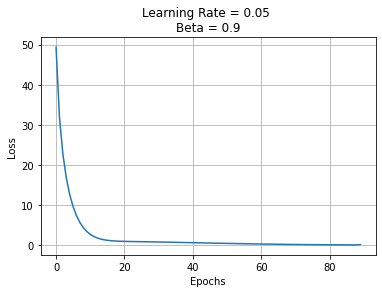

In [67]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05 \nBeta = 0.9')
plt.grid()
plt.show()

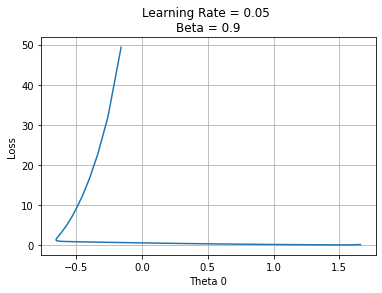

In [68]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05 \nBeta = 0.9')
plt.grid()
plt.show()

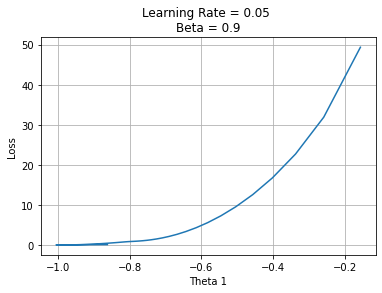

In [69]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05 \nBeta = 0.9')
plt.grid()
plt.show()

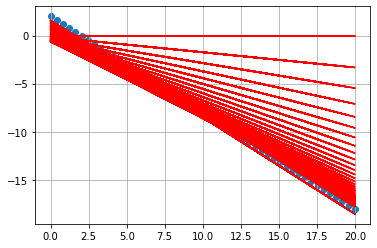

In [70]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

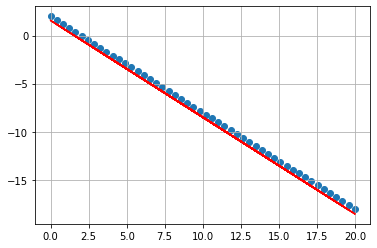

In [71]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [72]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = RmsProp(X,y,0.005,1e-08,0.9,5000)

Streaming output truncated to the last 5000 lines.
  6.01271136  7.15445535  1.67408419  2.58747938  6.69775775 -1.29445019
  8.06785054  2.13078178  7.38280415  0.3039914  -2.43619419  8.75289694
  2.35913058  3.95757217 -0.381055    0.53234019 -1.75114779 -2.20784539
  2.81582818  0.0756426   4.64261857  6.46940895  0.76068899  7.61115295
  4.87096736 -1.0661014   3.72922337  1.44573539 -0.8377526   0.98903779
  4.18592097 -1.97949659]
j =  10.416999672324195
Gradient Vector =  [[ 3.15835138]
 [50.99316162]]
Gradient Vector Norm =  51.090877031169775
theta_0_new  =  -0.4405394560814011
theta_1_new =  -0.4450038024683109
**************Iteration  86 **************
h(x) :  [-5.16302879 -4.79976038 -5.88956561 -6.79773663 -6.97937084 -1.16707628
 -7.34263925 -6.61610243 -3.34668674 -8.9773471  -7.88754186 -9.1589813
 -1.8936131  -4.98139458 -6.43446822 -8.61407869 -2.25688151 -3.89158935
 -7.16100504 -8.06917607 -3.70995515 -4.43649197 -7.70590766 -1.34871048
 -8.79571289 -4.07322356 -8.

In [73]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9650895099402907

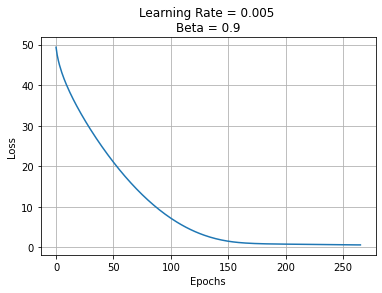

In [74]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005 \nBeta = 0.9')
plt.grid()
plt.show()

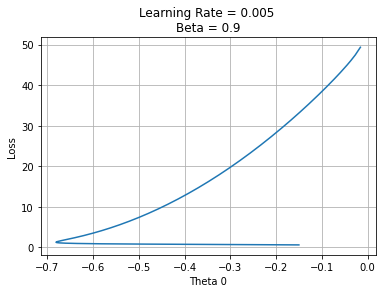

In [75]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005 \nBeta = 0.9')
plt.grid()
plt.show()

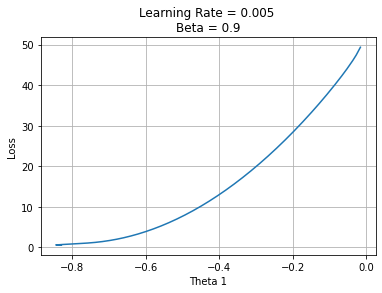

In [76]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005 \nBeta = 0.9')
plt.grid()
plt.show()

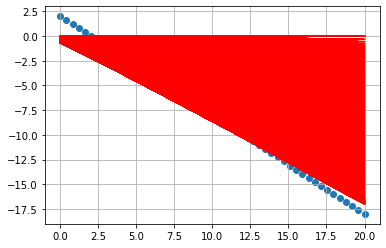

In [77]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

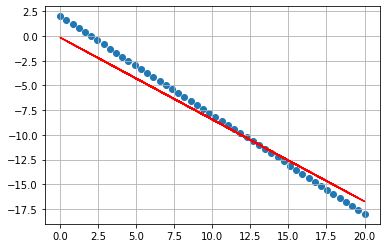

In [78]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [79]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = RmsProp(X,y,0.0005,1e-08,0.9,5000)

Streaming output truncated to the last 5000 lines.
**************Iteration  1426 **************
h(x) :  [ -8.21214414  -7.63443812  -9.36755618 -10.81182122 -11.10067423
  -1.85737793 -11.67838025 -10.52296822  -5.32361404 -14.27805734
 -12.54493928 -14.56691035  -3.01278997  -7.92329113 -10.23411521
 -13.70035132  -3.59049599  -6.19017307 -11.38952724 -12.83379229
  -5.90132006  -7.0567321  -12.25608627  -2.14623094 -13.98920433
  -6.47902608 -13.1226453   -4.16820201  -0.70196589 -14.85576336
  -6.76787909  -8.78985016  -3.30164298  -4.45705502  -1.56852492
  -0.9908189   -7.34558511  -3.879349    -9.65640919 -11.96723326
  -4.74590803 -13.41149831  -9.9452622   -2.43508395  -8.50099715
  -5.61246705  -2.72393696  -5.03476103  -9.07870317  -1.27967191]
Error Vector : 
 [ 0.40010076  0.16148025  0.87734178  1.47389306  1.59320332 -2.22472487
  1.83182383  1.35458281 -0.7930018   2.90561613  2.1897546   3.02492639
 -1.74748385  0.2807905   1.23527255  2.66699562 -1.50886333 -0.43507103

In [80]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9476184845511563

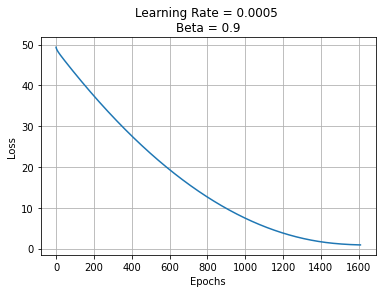

In [81]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005 \nBeta = 0.9')
plt.grid()
plt.show()

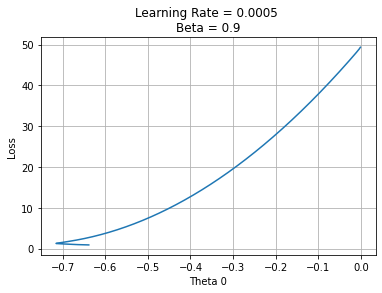

In [82]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005 \nBeta = 0.9')
plt.grid()
plt.show()

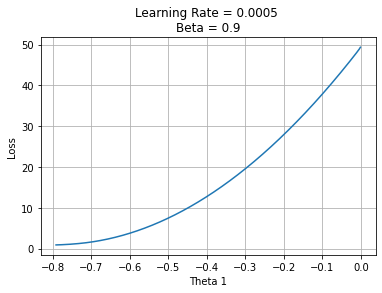

In [83]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005 \nBeta = 0.9')
plt.grid()
plt.show()

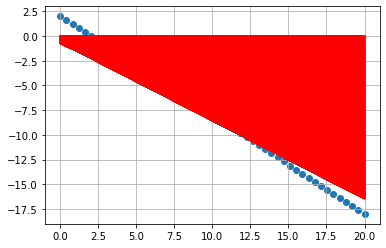

In [84]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

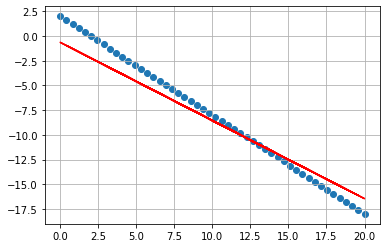

In [85]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [170]:
def Adam(x,y,learning_rate,epsilon,beta1,beta2,max_epochs) :
  iteration = 0
  iteration_arr = []
  theta_0 = 0
  theta_1 = 0
  theta_0_arr = []
  theta_1_arr = []
  j = []
  h_x_arr = []
  vt = [0,0]
  mt = [0,0]
  m_hat , v_hat = [0,0] , [0,0]
  while (len(j)<2) or (iteration < max_epochs and abs(j[-2]-j[-1]) > 0.001 and np.linalg.norm(gradient_vector) > 0.001) :
    h_x = theta_0 + theta_1 * x
    h_x_arr += [h_x]
    error_vector = h_x-y
    j = j + [np.dot(error_vector,error_vector)/(2*len(y))]

    d_theta_0 = np.sum(error_vector)/len(y)
    d_theta_1 = np.sum(error_vector*x)/len(y)

    mt[0] = beta1*mt[0] + (1-beta1)*d_theta_0 
    mt[1] = beta1*mt[1] + (1-beta1)*d_theta_1

    vt[0] = (beta2*vt[0] + (1-beta2)*(d_theta_0**2))
    vt[1] = (beta2*vt[1] + (1-beta2)*(d_theta_1**2))

    m_hat[0] =  mt[0] / ( 1-beta1**(iteration+1) )
    m_hat[1] =  mt[1] / ( 1-beta1**(iteration+1) )

    v_hat[0] = vt[0] / ( 1-beta2**(iteration+1) )
    v_hat[1] = vt[1] / ( 1-beta2**(iteration+1) )
    
    gradient_vector = np.array([ [d_theta_0],[d_theta_1] ])
    theta_0 = theta_0 - (learning_rate/(v_hat[0]**0.5+epsilon))*m_hat[0]
    theta_1 = theta_1 - (learning_rate/(v_hat[1]**0.5+epsilon))*m_hat[1]
    theta_0_arr = theta_0_arr + [theta_0]
    theta_1_arr = theta_1_arr + [theta_1]
    iteration_arr = iteration_arr + [iteration]
    print("**************Iteration ",iteration,"**************")
    print("h(x) : ",h_x)
    print("Error Vector : \n",error_vector)
    print("j = ",j[-1])
    print("Gradient Vector = ",gradient_vector)
    print("Gradient Vector Norm = ",np.linalg.norm(gradient_vector))
    print("M0 = ",m_hat[0])
    print("M1 = ",m_hat[1])
    print("V0 = ",v_hat[0])
    print("V1 = ",v_hat[1])
    print("theta_0_new  = ",theta_0)
    print("theta_1_new = ",theta_1)
    iteration += 1
  return theta_0_arr, theta_1_arr, j, h_x_arr, theta_0, theta_1, iteration_arr

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [171]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,0.05,1e-08,0.2,0.7,500)

**************Iteration  0 **************
h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector : 
 [ 8.6122449   7.79591837 10.24489796 12.28571429 12.69387755 -0.36734694
 13.51020408 11.87755102  4.53061224 17.18367347 14.73469388 17.59183673
  1.26530612  8.20408163 11.46938776 16.36734694  2.08163265  5.75510204
 13.10204082 15.14285714  5.34693878  6.97959184 14.32653061  0.04081633
 16.7755102   6.16326531 15.55102041  2.89795918 -2.         18.
  6.57142857  9.42857143  1.67346939  3.30612245 -0.7755102  -1.59183673
  7.3877551   2.48979592 10.65306122 13.91836735  3.71428571 15.95918367
 11.06122449  0.44897959  9.02040816  4.93877551  0.85714286  4.12244898
  9.83673469 -1.18367347]
j =  49.34693877551022
Gradient Vector =  [[  8.        ]
 [114.69387755]]
Gradient Vector Norm =  114.97254258164628
M0 =  8.0
M1 =  114.69387755102042
V0 =  64.0
V1 =  13154.6

In [172]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9989675218213939

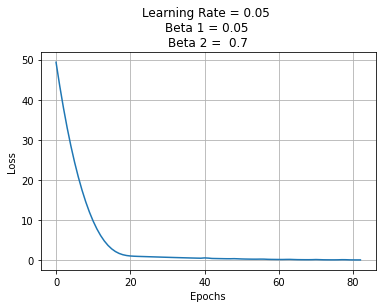

In [173]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05 \nBeta 1 = 0.05 \nBeta 2 =  0.7')
plt.grid()
plt.show()

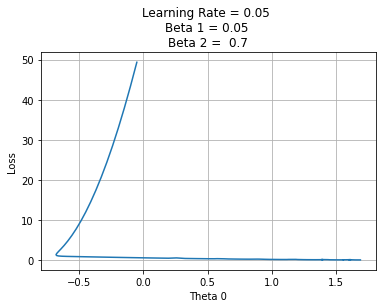

In [174]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05 \nBeta 1 = 0.05 \nBeta 2 =  0.7')
plt.grid()
plt.show()

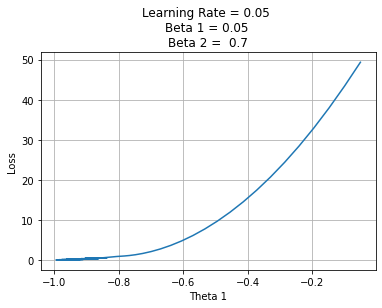

In [175]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.05 \nBeta 1 = 0.05 \nBeta 2 =  0.7')
plt.grid()
plt.show()

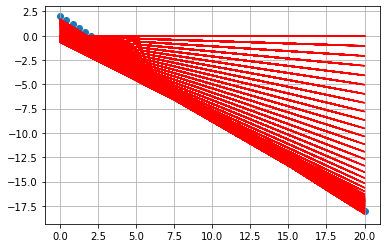

In [176]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

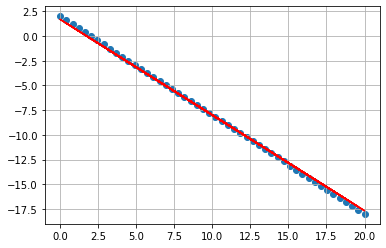

In [177]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [178]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,0.005,1e-08,0.5,0.8,500)

Streaming output truncated to the last 5000 lines.
 -0.64977831 -0.27392451 -1.29409912 -1.07932552 -1.61625952 -1.72364632
 -0.54239151 -1.18671232 -0.11284431  0.31670289 -1.02563212  0.58516989
 -0.05915091 -1.45517932 -0.32761791 -0.86455192 -1.40148592 -0.97193872
 -0.22023111 -1.66995292]
j =  0.40684378581708186
Gradient Vector =  [[-0.46185141]
 [-0.0545751 ]]
Gradient Vector Norm =  0.4650646946599225
M0 =  -0.4599568129026164
M1 =  -0.011868547165679972
V0 =  0.21424076422626076
V1 =  0.01035112917304606
theta_0_new  =  0.22762890035098446
theta_1_new =  -0.8678678937428307
**************Iteration  342 **************
h(x) :  [ -8.98239773  -8.27393414 -10.3993249  -12.17048387 -12.52471566
  -1.18929827 -13.23317925 -11.81625207  -5.44007979 -16.42126539
 -14.29587463 -16.77549718  -2.60622545  -8.62816593 -11.46202028
 -15.7128018   -3.31468903  -6.50277517 -12.87894745 -14.65010642
  -6.14854338  -7.56547055 -13.94164283  -1.54353007 -16.06703359
  -6.85700697 -15.00433821 

In [179]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9926271265445945

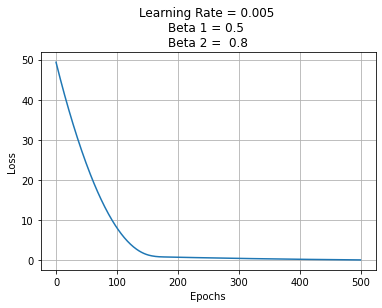

In [180]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005 \nBeta 1 = 0.5 \nBeta 2 =  0.8')
plt.grid()
plt.show()

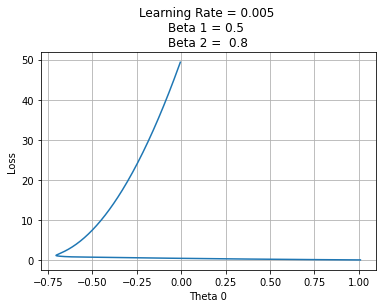

In [181]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005 \nBeta 1 = 0.5 \nBeta 2 =  0.8')
plt.grid()
plt.show()

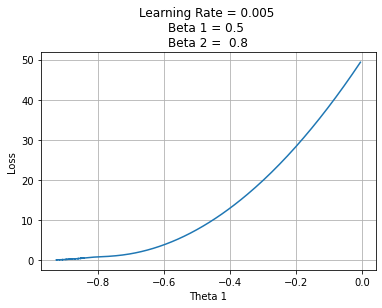

In [182]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.005 \nBeta 1 = 0.5 \nBeta 2 =  0.8')
plt.grid()
plt.show()

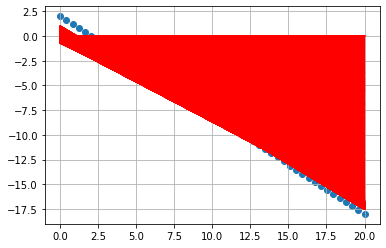

In [183]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

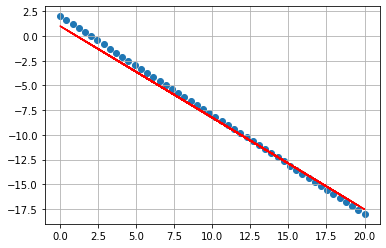

In [184]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [185]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,0.0005,1e-08,0.8,0.8,5000)

Streaming output truncated to the last 5000 lines.
V0 =  0.03685161565898563
V1 =  143.2900659635569
theta_0_new  =  -0.712357583189797
theta_1_new =  -0.7124728618989548
**************Iteration  1425 **************
h(x) :  [ -8.27329408  -7.69168358  -9.43651508 -10.89054132 -11.18134657
  -1.87557858 -11.76295707 -10.59973607  -5.36524158 -14.38020432
 -12.63537282 -14.67100957  -3.03879958  -7.98248883 -10.30893083
 -13.79859382  -3.62041008  -6.23765733 -11.47215182 -12.92617807
  -5.94685208  -7.11007308 -12.34456757  -2.16638383 -14.08939907
  -6.52846258 -13.21698332  -4.20202058  -0.71235758 -14.96181482
  -6.81926783  -8.85490458  -3.32960483  -4.49282583  -1.58477333
  -1.00316283  -7.40087833  -3.91121533  -9.72732033 -12.05376232
  -4.78363108 -13.50778857 -10.01812558  -2.45718908  -8.56409933
  -5.65604683  -2.74799433  -5.07443633  -9.14570983  -1.29396808]
Error Vector : 
 [ 0.33895082  0.10423479  0.80838288  1.39517296  1.51253098 -2.24292552
  1.74724701  1.27781495 

In [186]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9467806664066584

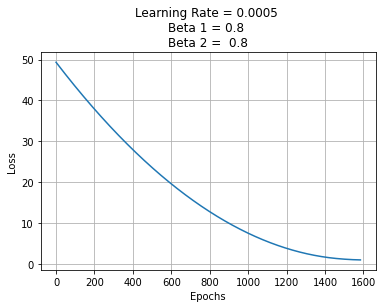

In [187]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005 \nBeta 1 = 0.8 \nBeta 2 =  0.8')
plt.grid()
plt.show()

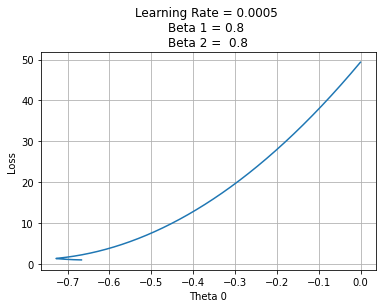

In [188]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005 \nBeta 1 = 0.8 \nBeta 2 =  0.8')
plt.grid()
plt.show()

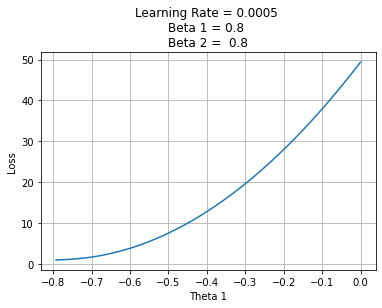

In [189]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.0005 \nBeta 1 = 0.8 \nBeta 2 =  0.8')
plt.grid()
plt.show()

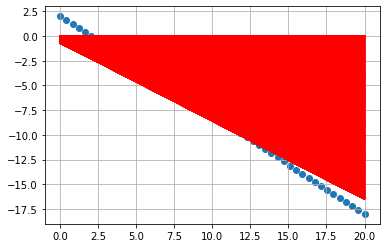

In [190]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

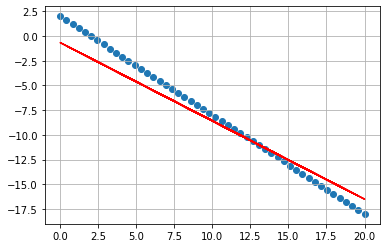

In [191]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [193]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,0.001,1e-08,0.9,0.99,5000)

Streaming output truncated to the last 5000 lines.
**************Iteration  904 **************
h(x) :  [ -8.41971003  -7.82340835  -9.61231337 -11.10306755 -11.40121838
  -1.86039164 -11.99752006 -10.80491671  -5.43820167 -14.68087758
 -12.89197256 -14.97902841  -3.05299498  -8.12155919 -10.50676588
 -14.08457591  -3.64929665  -6.33265417 -11.69936922 -13.1901234
  -6.03450334  -7.22710668 -12.59382173  -2.15854247 -14.38272674
  -6.63080501 -13.48827424  -4.24559832  -0.66778829 -15.27717925
  -6.92895585  -9.0160117   -3.35114581  -4.54374916  -1.5622408
  -0.96593913  -7.52525752  -3.94744749  -9.9104642  -12.29567089
  -4.84189999 -13.78642507 -10.20861504  -2.45669331  -8.71786086
  -5.7363525   -2.75484414  -5.14005083  -9.31416253  -1.26408996]
Error Vector : 
 [ 0.19253487 -0.02748999  0.63258459  1.18264674  1.29265917 -2.22773857
  1.51268403  1.07263431 -0.90758942  2.50279589  1.84272131  2.61280832
 -1.78768886  0.08252244  0.96262188  2.28277103 -1.567664   -0.57755213
  

In [194]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9485667803280174

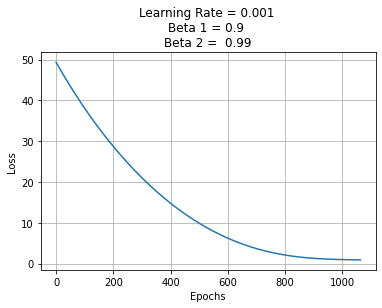

In [195]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.001 \nBeta 1 = 0.9 \nBeta 2 =  0.99')
plt.grid()
plt.show()

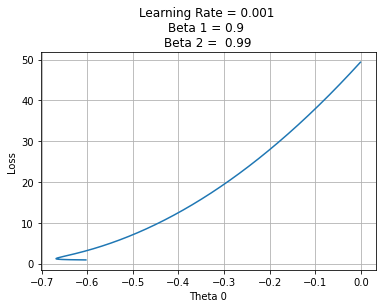

In [196]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.001 \nBeta 1 = 0.9 \nBeta 2 =  0.99')
plt.grid()
plt.show()

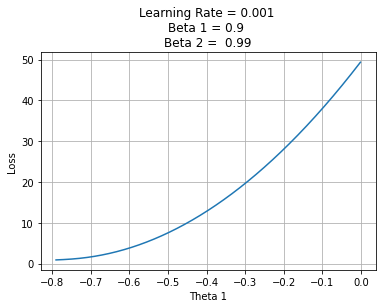

In [197]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title('Learning Rate = 0.001 \nBeta 1 = 0.9 \nBeta 2 =  0.99')
plt.grid()
plt.show()

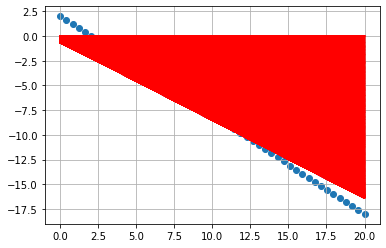

In [198]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

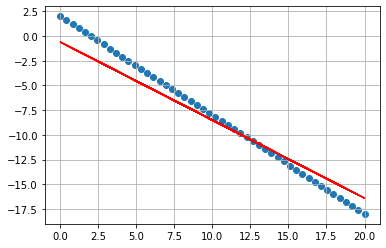

In [199]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [202]:
alpha = 0.001
beta1 = 0.9
beta2 = 0.5
epsilon = 1e-08
iterations = 5000

In [203]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,alpha,epsilon,beta1,beta2,iterations)

Streaming output truncated to the last 5000 lines.
theta_1_new =  -0.6115707058654978
**************Iteration  600 **************
h(x) :  [ -7.10455244  -6.60531105  -8.10303523  -9.35113871  -9.60075941
  -1.61289713 -10.1000008   -9.10151801  -4.60834548 -12.34658707
 -10.84886289 -12.59620776  -2.61137991  -6.85493175  -8.85189732
 -11.84734567  -3.1106213   -5.35720757  -9.8503801  -11.09848358
  -5.10758687  -6.10606966 -10.59924219  -1.86251782 -12.09696637
  -5.60682827 -11.34810428  -3.6098627   -0.61441434 -12.84582846
  -5.85644896  -7.60379384  -2.86100061  -3.85948339  -1.36327643
  -0.86403504  -6.35569036  -3.360242    -8.35265593 -10.3496215
  -4.10910409 -11.59772498  -8.60227662  -2.11213852  -7.35417314
  -4.85796618  -2.36175922  -4.35872479  -7.85341453  -1.11365573]
Error Vector : 
 [ 1.50769245  1.19060732  2.14186273  2.93457557  3.09311814 -1.98024407
  3.41020328  2.77603301 -0.07773324  4.8370864   3.88583099  4.99562897
 -1.34607379  1.34914988  2.61749044  4

In [204]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.944245878919177

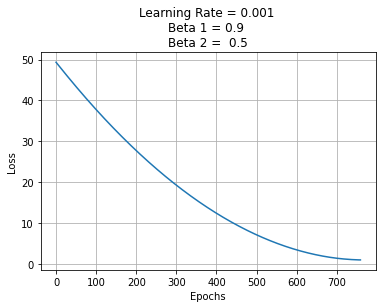

In [205]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

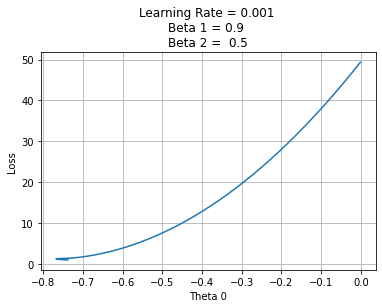

In [206]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

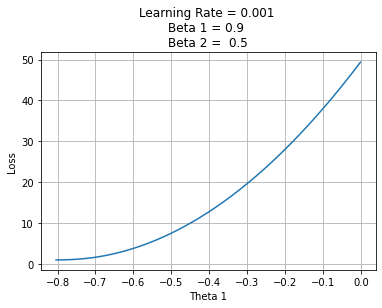

In [207]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

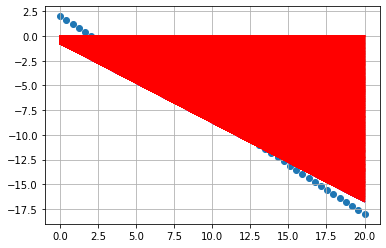

In [208]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

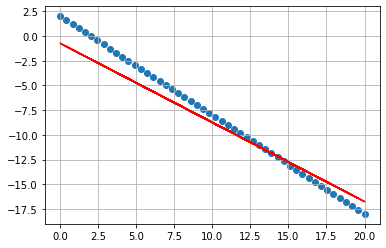

In [209]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [210]:
alpha = 0.001
beta1 = 0.5
beta2 = 0.99
epsilon = 1e-08
iterations = 5000

In [211]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,alpha,epsilon,beta1,beta2,iterations)

Streaming output truncated to the last 5000 lines.
V0 =  0.8403427143804711
V1 =  376.60915681636135
theta_0_new  =  -0.662802402349414
theta_1_new =  -0.7357849574365956
**************Iteration  931 **************
h(x) :  [ -8.47113256  -7.87049178  -9.67241413 -11.17401608 -11.47433647
  -1.86408397 -12.07497725 -10.87369569  -5.46792865 -14.77786077
 -12.97593842 -15.07818116  -3.06536553  -8.17081217 -10.5733753
 -14.17721999  -3.66600631  -6.36888983 -11.77465686 -13.27625882
  -6.06856944  -7.269851   -12.67561803  -2.16440436 -14.47754038
  -6.66921022 -13.57657921  -4.26664709  -0.6628024  -15.37850155
  -6.96953061  -9.07177334  -3.36568592  -4.56696748  -1.56376357
  -0.96312279  -7.57017139  -3.9663267   -9.97273452 -12.37529764
  -4.86728787 -13.8768996  -10.27305491  -2.46472475  -8.77145295
  -5.76824905  -2.76504514  -5.16760826  -9.37209374  -1.26344318]
Error Vector : 
 [ 0.14111234 -0.07457341  0.57248383  1.11169821  1.21954108 -2.2314309
  1.43522683  1.00385533 -0.

In [212]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.949344733641701

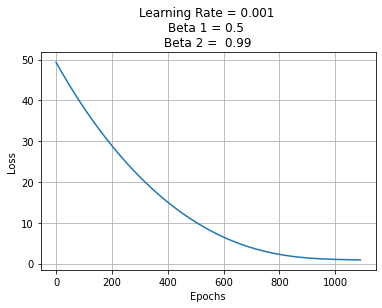

In [213]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

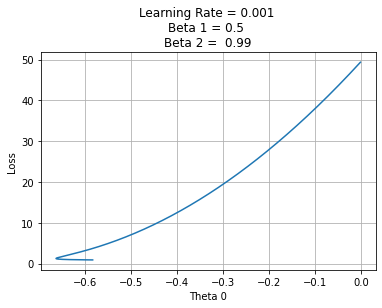

In [214]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

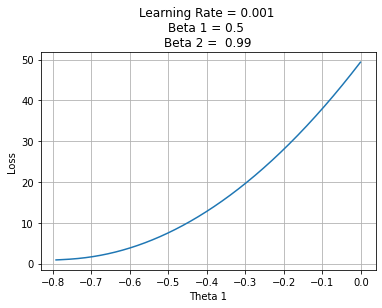

In [215]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

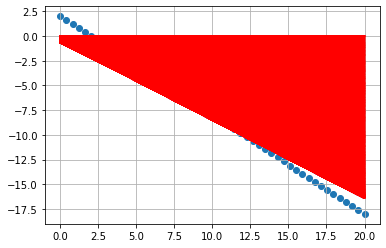

In [216]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

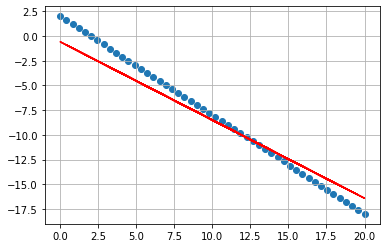

In [217]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [218]:
alpha = 0.001
beta1 = 0.5
beta2 = 0.5
epsilon = 1e-08
iterations = 5000

In [219]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,alpha,epsilon,beta1,beta2,iterations)

Streaming output truncated to the last 5000 lines.
 [21.94591096]]
Gradient Vector Norm =  21.966422735211886
M0 =  0.9600620916096296
M1 =  22.090597952186968
V0 =  0.9219611961782967
V1 =  488.036386592624
theta_0_new  =  -0.6419898561363137
theta_1_new =  -0.6419946948468236
**************Iteration  642 **************
h(x) :  [ -7.45499478  -6.93091748  -8.50314938  -9.81334264 -10.07538129
  -1.69014446 -10.59945859  -9.55130399  -4.83460827 -12.95780645
 -11.38557455 -13.2198451   -2.73829906  -7.19295613  -9.28926534
 -12.43372915  -3.26237637  -5.62072422 -10.33741994 -11.6476132
  -5.35868557  -6.40684018 -11.12353589  -1.95218311 -12.6957678
  -5.88276288 -11.90965185  -3.78645367  -0.64198986 -13.48188375
  -6.14480153  -7.97907208  -3.00033771  -4.04849232  -1.42810581
  -0.90402851  -6.66887883  -3.52441502  -8.76518804 -10.86149724
  -4.31053097 -12.1716905   -9.02722669  -2.21422176  -7.71703343
  -5.09664692  -2.47626041  -4.57256962  -8.24111073  -1.16606716]
Error Vect

In [220]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9475845101116701

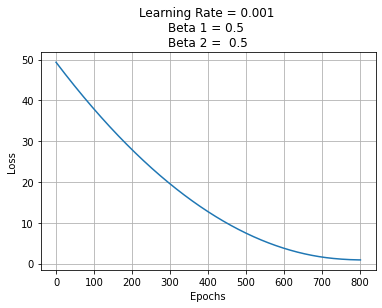

In [221]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

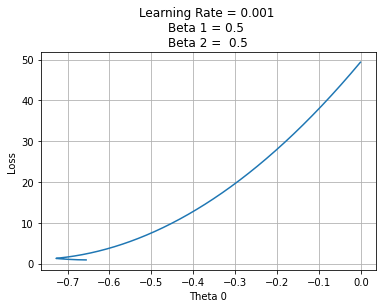

In [222]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

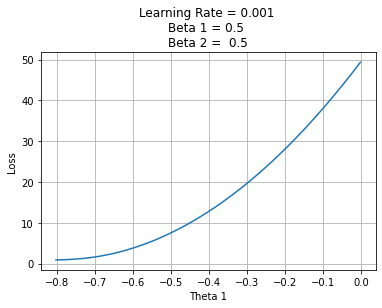

In [223]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

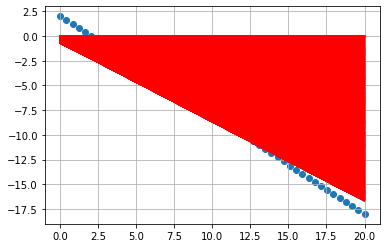

In [224]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

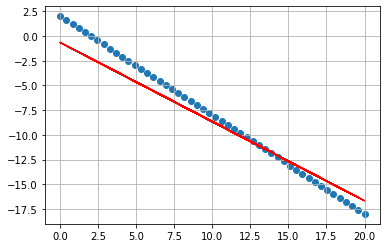

In [225]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [226]:
alpha = 0.01
beta1 = 0.9
beta2 = 0.99
epsilon = 1e-08
iterations = 5000

In [227]:
theta_0 , theta_1 , j , h_x , theta_0_opt , theta_1_opt , epochs = Adam(X,y,alpha,epsilon,beta1,beta2,iterations)

Streaming output truncated to the last 5000 lines.
  -1.05269582 -13.22290039 -11.79111162  -5.34806214 -16.44442513
 -14.29674197 -16.80237232  -2.4844846   -8.56958688 -11.43316442
 -15.72853074  -3.20037898  -6.42190372 -12.8649532  -14.65468916
  -6.06395653  -7.4957453  -13.93879478  -1.41064302 -16.08647794
  -6.77985091 -15.01263636  -3.91627337   0.37909295 -17.16031951
  -7.13779811  -9.64342846  -2.84243179  -4.27422056  -0.69474863
   0.02114576  -7.85369249  -3.55832618 -10.71727004 -13.58084758
  -4.63216776 -15.37058355 -11.07521723  -1.76859021  -9.28548127
  -5.70600933  -2.1265374   -4.99011495 -10.00137565  -0.33680144]
Error Vector : 
 [-0.31528917 -0.41572132 -0.11442489  0.13665547  0.18687155 -1.42004276
  0.28730369  0.0864394  -0.8174499   0.73924834  0.43795191  0.78946441
 -1.21917847 -0.36550525  0.03622333  0.6388162  -1.11874633 -0.66680168
  0.23708762  0.48816798 -0.71701775 -0.51615346  0.38773584 -1.36982669
  0.68903227 -0.61658561  0.53838405 -1.01831

In [228]:
y_pred_GD = h_x[-1]
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.9952892444628807

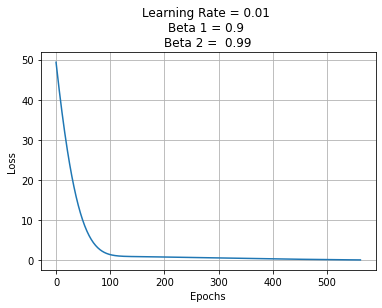

In [229]:
plt.plot(epochs,j)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

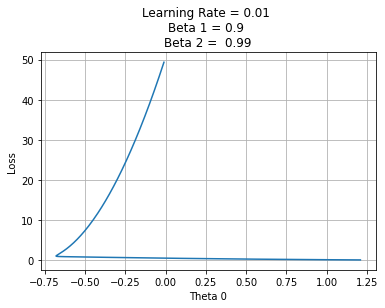

In [230]:
plt.plot(theta_0,j)
plt.xlabel("Theta 0")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

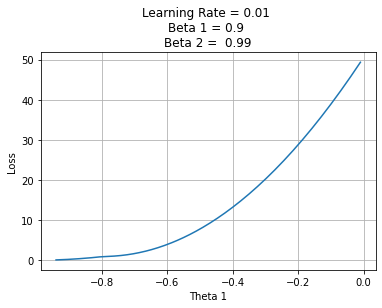

In [231]:
plt.plot(theta_1,j)
plt.xlabel("Theta 1")
plt.ylabel("Loss")
plt.title(f'Learning Rate = {alpha} \nBeta 1 = {beta1} \nBeta 2 =  {beta2}')
plt.grid()
plt.show()

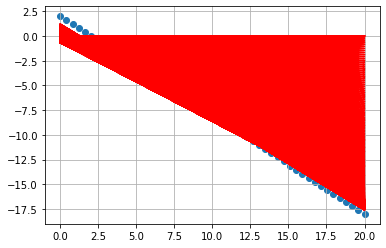

In [232]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'b')
for i in h_x : 
  plt.plot(X,i,'r')
plt.grid()
plt.show()

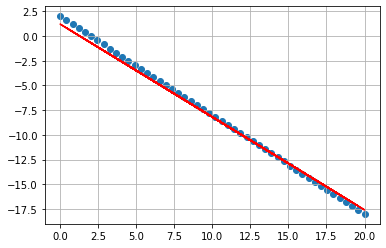

In [233]:
plt.scatter(X,y)
plt.plot(X,h_x[-1],'r')
plt.grid()
plt.show()

## Congratulations 
![image.png](attachment:image.png)